# Segmentation

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset
from helpers import imshow
# Make the colormap reproducible
np.random.seed(2563)

## Creation of a Dataset container

In [2]:
DATASET_PATH= './Data'
dp = Dataset(path=DATASET_PATH)[0]

## Color map

In [3]:
print('\n'.join(['Background: [1. 1. 1.]', f'Eyebrow: {dp.eyebrows}', f'Scalp: {dp.scalp}', f'Head: {dp.head}', f'Eye left: {dp.eye_left}', f'Eye right: {dp.eye_right}', 
f'Tearduct left: {dp.tearduct_left}',  f'Tearduct right: {dp.tearduct_right}',  f'Mouth geometry: {dp.Mouth_geo}',  f'Lower teeth geometry: {dp.Teeth_low_geo}',
f'Upper teeth geometry: {dp.Teeth_up_geo}', f'Face: {dp.face}',  f'Nose: {dp.nose}',  f'Right ear: {dp.ear_right}', f'Left ear: {dp.ear_left}',
f'Upper lip: {dp.lips_up}', f'Lower lip: {dp.lips_bottom}']))

Background: [1. 1. 1.]
Eyebrow: [0.39999 0.39999 0.39999]
Scalp: [0.19999 0.19999 0.19999]
Head: [0.3 0.3 0.3]
Eye left: [0.6 0.6 0.6]
Eye right: [0.5 0.5 0.5]
Tearduct left: [0.1 0.1 0.1]
Tearduct right: [0. 0. 0.]
Mouth geometry: [0.89999 0.89999 0.89999]
Lower teeth geometry: [0.8 0.8 0.8]
Upper teeth geometry: [0.69999 0.69999 0.69999]
Face: [0.82279 0.0319  0.01681]
Nose: [0.17465 0.30054 0.0382 ]
Right ear: [0.86316 0.24228 0.23074]
Left ear: [0.18782 0.96469 0.45079]
Upper lip: [1.      0.9911  0.08866]
Lower lip: [0.016   0.26225 1.     ]


## Segmentation Visualization

Set a random color map for segmentation visualization and apply it to segmentation map

In [4]:
segmap_colormap = (np.random.uniform(size=(1,1,3)) * 255).astype('uint8')

def segmap_to_color(segmap):
    segmap = np.repeat(segmap[..., np.newaxis], 3, axis=2)
    segmap = (np.sin(segmap * 255/20) * 127 + 128).astype('uint8')
    segmap += segmap_colormap
    return segmap

Text(0.5, 1.0, 'Segmentation map')

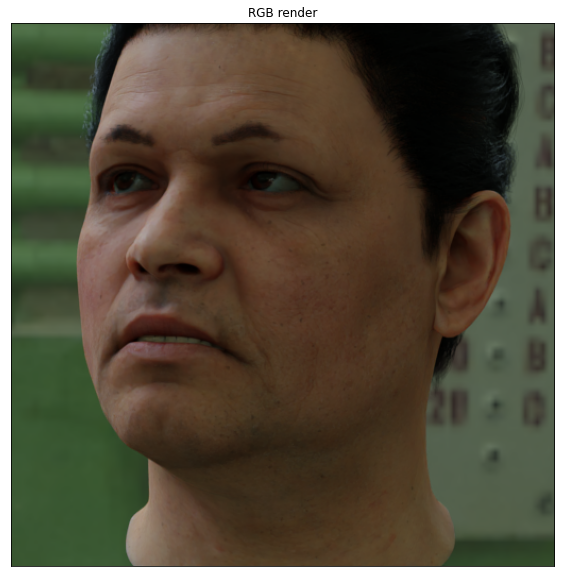

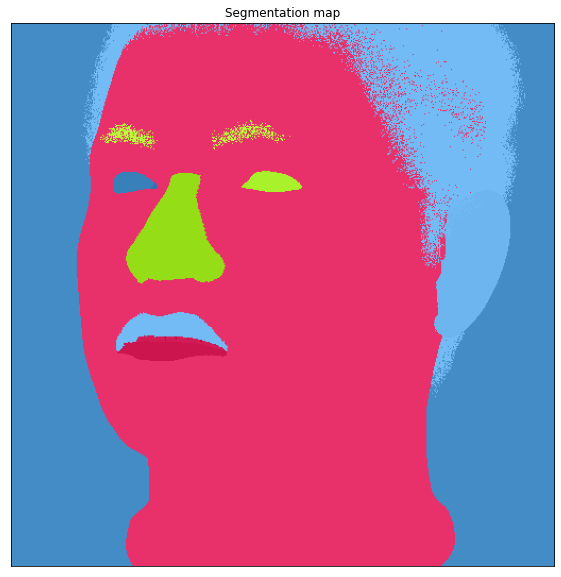

In [15]:
imshow(dp.rgb_img)
plt.title('RGB render')

imshow(segmap_to_color(dp.semantic_seg_map))
plt.title('Segmentation map')

## Background removal

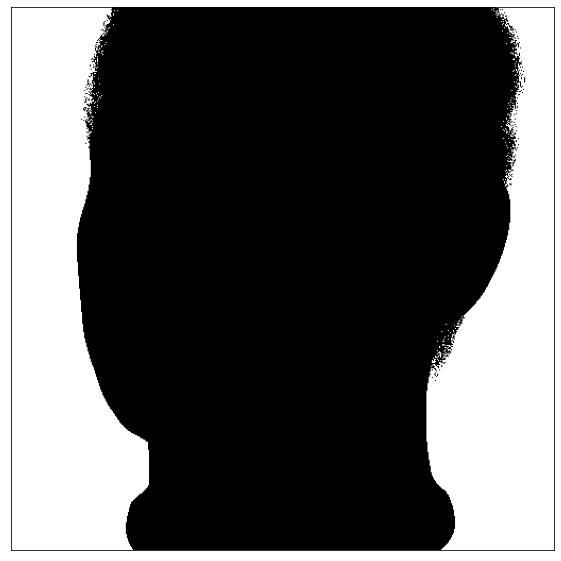

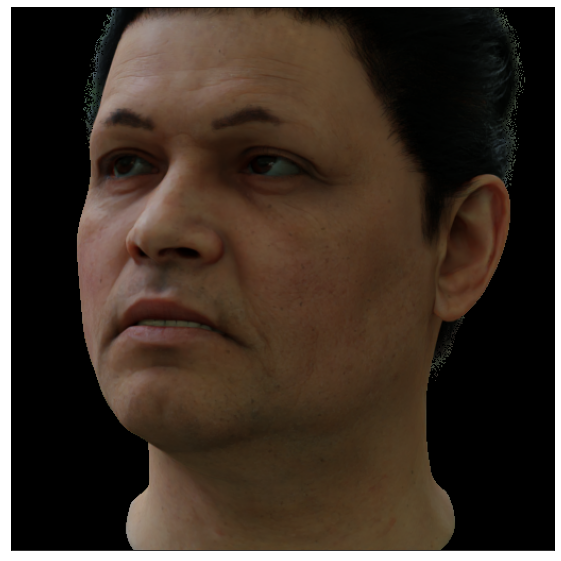

In [14]:
rgb_no_background = dp.rgb_img.copy()
background_mask = np.tile((dp.semantic_seg_map == 1.)[..., np.newaxis], (1, 1, 3))
imshow(background_mask.astype('float'))
plt.title('Background mask')

rgb_no_background[background_mask] = 0

imshow(rgb_no_background)
plt.title('Rgb render without background')